# Data Analysis for the Online Store "Strimchik"

This project involves analyzing and processing data from open sources about games released between 1980 and 2016. <br>
The goal of the project is to <b>identify patterns</b> for selecting a potentially successful product and promoting it <b>in 2017</b>. To achieve this goal, I plan to:

1. Review the data obtained from the service.  
2. Check the data for missing values, fill them in if possible, remove duplicates, and convert the data to the most suitable format.  
3. Identify the data relevant for the study.  
4. Analyze the dependence of game sales on various parameters (platform, genre, ratings).  
5. Study user behavior patterns in different regions.  
6. Formulate and test hypotheses.  
7. Write the recommendations

## Data preparation

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [101]:
df = pd.read_csv('/datasets/games.csv')
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-info">
Loaded the data. We have 16,715 records. The records contain information about:

1. Game title  
2. Platform  
3. Release year  
4. Genre  
5. Sales columns for North America, Europe, Japan, and the rest of the world  
6. Critic and user ratings  
7. Game age rating  

### Replace column names (convert to lower case)

In [102]:
df.rename(str.lower, axis='columns', inplace = True)
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-info">

Converted column names to lowercase.

### Convert the data into the necessary types. Describe which columns were changed and why. Handle missing values if necessary.  

In [103]:
print(df['name'].isna().sum())
print(df['year_of_release'].isna().sum())
df = df.dropna(subset = ['name', 'year_of_release'])
df.info()

2
269
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-info">
Deleted rows without a name and release year. There were only two games without a name, and the absence of a release year makes the records irrelevant for future tasks (as it will be necessary to select a relevant period for forecasting).

In [104]:
print(df['user_score'].unique())
print(df['critic_score'].unique())
print(df['rating'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [105]:
df['user_score'] = df['user_score'].replace({'tbd' : np.nan})
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


<div class="alert alert-info">
Replaced "tbd" (to be decided/determined) with NaN in `user_score`, as it essentially represents a missing rating with a promise that it will be provided later.  

In [106]:
df = df.astype({'year_of_release' : 'int32', 'user_score' : 'float32', 'critic_score' : 'float32',
                'na_sales' : 'float32', 'eu_sales' : 'float32', 'jp_sales' : 'float32', 'other_sales' : 'float32' })
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float32
 9   user_score       7463 non-null   float32
 10  rating           9768 non-null   object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


<div class="alert alert-info">
Converted `year` to an integer for better efficiency, `critic_score` to float since it contains numerical values.<br> 
`user_score` to float because it can handle NaN values, unlike int.  

<div class="alert alert-info">
There are still missing values in the ratings and age rating columns. Filling them with mean or median values is meaningless since a game's rating and age classification can vary regardless of its genre, platform, sales, or release year. <br>

1. Regarding ratings, a game might have been either not popular enough to be listed or released before such ratings were introduced.  
2. As for the age rating, specialized organizations handle this process, which takes time, so a game might not have received a rating yet or was never intended to have one.  

### Calculate total sales across all regions and store them in a separate column.  

In [107]:
df['sum_sales'] = df[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis=1)
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [108]:
print(df.duplicated().sum())

0


<div class="alert alert-info">
    
Added an additional column for total global sales and checked for duplicates. None were found, so moving on to exploratory data analysis.

## Exploratory Data Analysis

### Analyze the number of games released in different years. Are data from all periods relevant?  

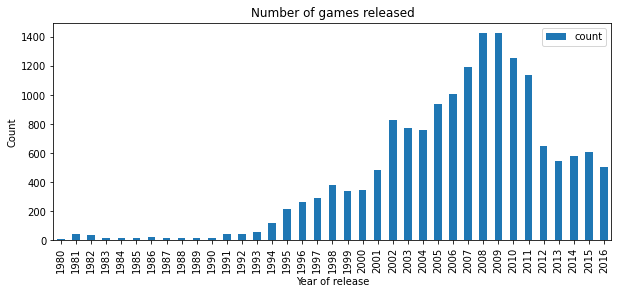

In [109]:
df_years = df.groupby('year_of_release').agg({'name':'count'})
df_years.rename(columns={'name': 'count'}, inplace = True)
df_years.plot.bar(title = 'Number of games released', figsize = (10, 4), xlabel = 'Year of release', ylabel = "Count");

<div class="alert alert-info">
    
The highest number of games were released between 2002 and 2011, followed by a decline. It is clearly unnecessary to consider data from the entire period for the analysis. Until 2009, game production was growing, but then it declined, marking the beginning of a "new era" with new industry rules.

### Analyze how sales have changed across platforms. Select platforms with the highest total sales and visualize their distribution over the years. What is the typical lifecycle of gaming platforms? How long do new platforms emerge, and old ones disappear?

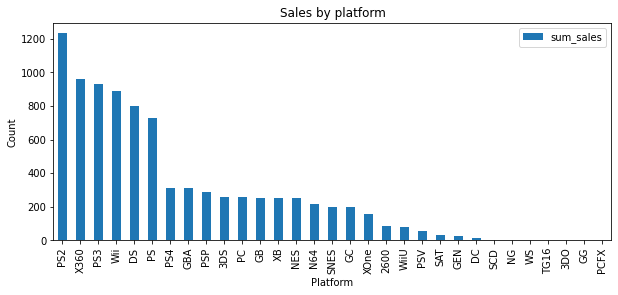

In [110]:
df_platforms = df.pivot_table(index=['platform'], values = 'sum_sales', aggfunc = 'sum')
df_platforms = df_platforms.sort_values('sum_sales', ascending = False)
df_platforms.plot.bar(title = 'Sales by platform', xlabel = 'Platform', ylabel = 'Count', figsize = (10,4));

In [111]:
platforms_top = df_platforms.index[:6]
display(platforms_top)

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

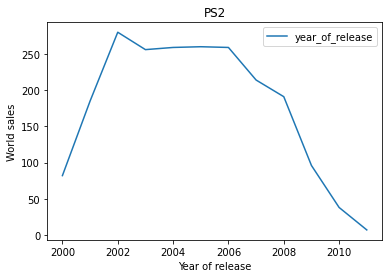

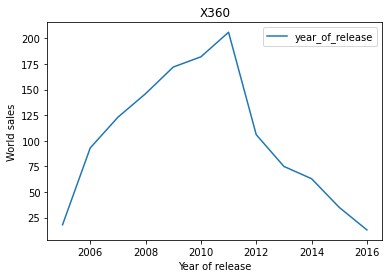

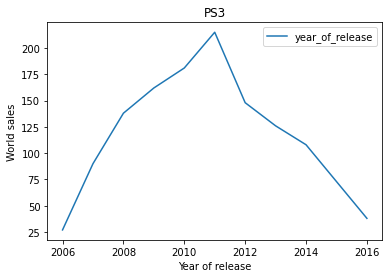

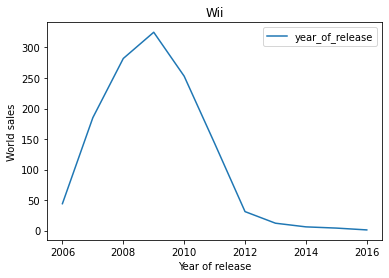

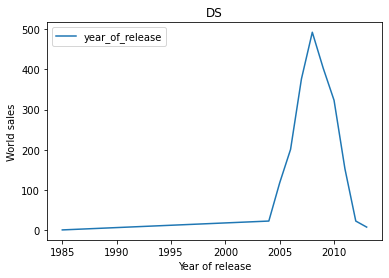

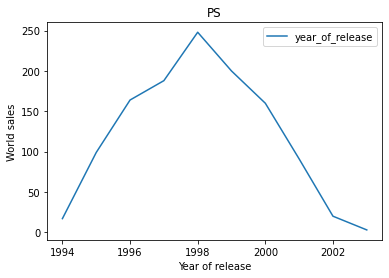

In [112]:
for platform in platforms_top:
    platform_years = df.query('platform == @platform').pivot_table(index ='year_of_release',
                                                                   values = 'sum_sales', aggfunc = 'count')
    platform_years.columns = ['year_of_release']
    platform_years.plot(title = platform, xlabel = 'Year of release', ylabel = 'World sales')

<div class="alert alert-info">
Platforms typically take 6–7 years to reach their peak after launch, followed by a decline. To capture the period of dynamic changes, we would need data spanning six years, with 2017 as the sixth year—meaning from 2012 to 2016. This timeframe aligns with the transition into a new era.

<b>However, I will use three years (2014–2016), following established and well-tested practices.</b>

### Take data for the relevant current period. Determine the current period yourself as a result of researching the previous questions. The main factor is that these data will help build a forecast for 2017. Do not take into account data for previous years in your work.

In [113]:
df_actual = df.query('year_of_release > 2013')
print(df_actual.info())
display(df_actual.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float32
 5   eu_sales         1689 non-null   float32
 6   jp_sales         1689 non-null   float32
 7   other_sales      1689 non-null   float32
 8   critic_score     718 non-null    float32
 9   user_score       888 non-null    float32
 10  rating           940 non-null    object 
 11  sum_sales        1689 non-null   float32
dtypes: float32(7), int32(1), object(4)
memory usage: 118.8+ KB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


In [114]:
df_platform_years = df_actual.pivot_table(index = ['platform', 'year_of_release'], values = 'sum_sales', aggfunc = 'sum')
display(df_platform_years)

sum_sales
platform year_of_release           
3DS      2014                 43.76
         2015                 27.78
         2016                 15.14
PC       2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2014                100.00
         2015                118.90
         2016                 69.25
PSP      2014                  0.24
         2015                  0.12
PSV      2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2014                 54.07
         2015                 60.14
         2016                 26.15

In [115]:
df_actual = df_actual.query('platform != "DS" and platform != "PSP"')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1676 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1676 non-null   object 
 1   platform         1676 non-null   object 
 2   year_of_release  1676 non-null   int32  
 3   genre            1676 non-null   object 
 4   na_sales         1676 non-null   float32
 5   eu_sales         1676 non-null   float32
 6   jp_sales         1676 non-null   float32
 7   other_sales      1676 non-null   float32
 8   critic_score     718 non-null    float32
 9   user_score       888 non-null    float32
 10  rating           940 non-null    object 
 11  sum_sales        1676 non-null   float32
dtypes: float32(7), int32(1), object(4)
memory usage: 117.8+ KB


<div class="alert alert-info">
Filtered out all games released before 2014 and removed platforms that stopped receiving new releases by 2016 (DS and PSP).  

A total of 1,676 records remain.

### Which platforms are leading in sales, growing or declining? Select a few potentially profitable platforms.

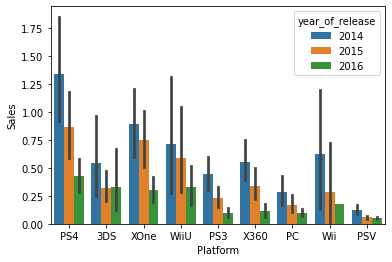

In [116]:
sns.barplot(data = df_actual, y = 'sum_sales', x = 'platform', hue = 'year_of_release')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

In [117]:
platform_top = df_actual.pivot_table(index = 'platform', values = 'sum_sales', aggfunc='sum')
print(platform_top.sort_values('sum_sales', ascending = False))

          sum_sales
platform           
PS4          288.15
XOne         140.36
3DS           86.68
PS3           68.18
X360          48.22
WiiU          42.98
PC            27.05
PSV           22.40
Wii            5.07


<div class="alert alert-info">
The sales leaders are PS4, PS3, X360, 3DS, and XOne. However, over the last year, sales have declined for all of them. X360 has significantly weakened, seemingly handing over its position to XOne. PS3 has also dropped to single-digit figures, giving up its share to PS4.  

### Create a box plot of global game sales, broken down by platform. Describe the results.  

In [118]:
platform_sales = df_actual.pivot_table(index=['platform'], values = 'sum_sales', aggfunc = 'sum').sort_values('sum_sales', ascending = False)
platform_top = platform_sales.head().index
df_actual_top = df_actual.query('platform.isin(@platform_top)')

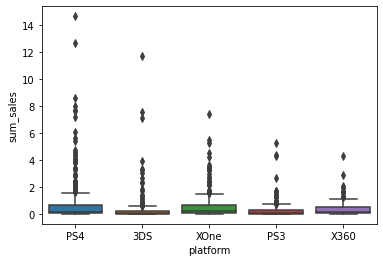

In [119]:
ax = sns.boxplot(data = df_actual_top, x = "platform", y = "sum_sales")
plt.show()

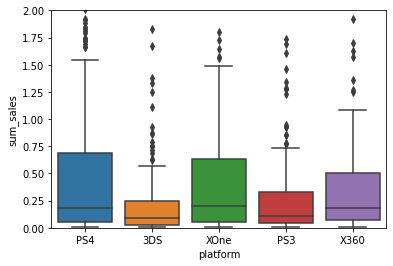

In [120]:
ax = sns.boxplot(data = df_actual_top, x = "platform", y = "sum_sales")
ax.set(ylim = (0,2))
plt.show()

In [121]:
for platform in platform_top:
    print(platform)
    print(df_actual.query('platform == @platform')['sum_sales'].describe())
    print()

PS4
count   376.00
mean      0.77
std       1.61
min       0.01
25%       0.06
50%       0.19
75%       0.69
max      14.63
Name: sum_sales, dtype: float64

XOne
count   228.00
mean      0.62
std       1.05
min       0.01
25%       0.05
50%       0.20
75%       0.63
max       7.39
Name: sum_sales, dtype: float64

3DS
count   212.00
mean      0.41
std       1.19
min       0.01
25%       0.03
50%       0.09
75%       0.25
max      11.68
Name: sum_sales, dtype: float64

PS3
count   219.00
mean      0.31
std       0.63
min       0.01
25%       0.04
50%       0.11
75%       0.33
max       5.27
Name: sum_sales, dtype: float64

X360
count   111.00
mean      0.43
std       0.63
min       0.01
25%       0.07
50%       0.18
75%       0.51
max       4.28
Name: sum_sales, dtype: float64



<div class="alert alert-info">
Conclusions:  

1. All platforms exhibit a significant number of outliers. Some games become massive hits, reaching multimillion sales (up to 14.63 million on PS4).  
2. More than half of the games do not exceed 200,000 copies in sales. For the top platforms, the median sales range from 90,000 to 200,000 copies.  
3. PS4 is currently the most successful platform, with an average of 770,000 copies sold per game—150,000 more than its closest competitor, XOne, and significantly higher than the rest.  

### Analyze how user and critic reviews affect sales within a single popular platform. Create a scatter plot and calculate the correlation between reviews and sales. Formulate conclusions.  

In [122]:
def show_correlation(platform):
    df_platform = df_actual.query('platform == @platform')
    platform_scores_and_sales = df_platform.loc[ :, ['user_score', 'critic_score','sum_sales']]
    print(platform_scores_and_sales.corr())
    pd.plotting.scatter_matrix(platform_scores_and_sales, figsize = (15,15));

              user_score  critic_score  sum_sales
user_score          1.00          0.55      -0.04
critic_score        0.55          1.00       0.40
sum_sales          -0.04          0.40       1.00


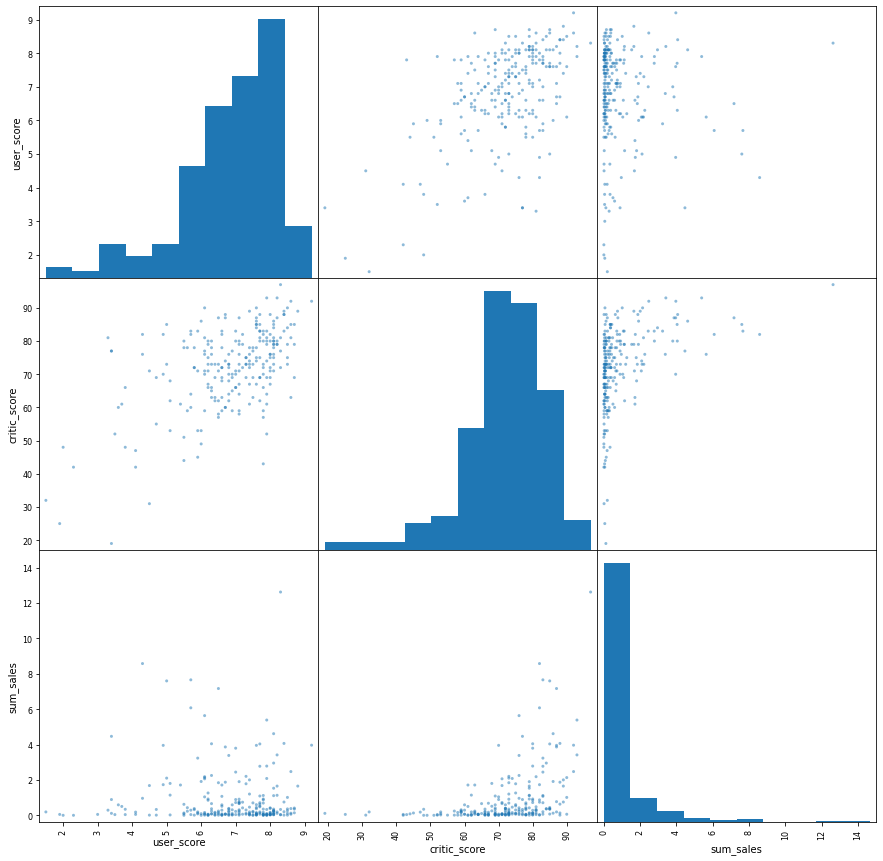

In [123]:
show_correlation('PS4')

<div class="alert alert-info">
For PS4:  

1. There is a correlation between critic scores and total sales. 
2. There is almost no correlation between user scores and total sales.  
3. There is also a correlation between critic scores and user scores.  

### Compare these findings with game sales on other platforms.  

              user_score  critic_score  sum_sales
user_score          1.00          0.69      -0.17
critic_score        0.69          1.00       0.45
sum_sales          -0.17          0.45       1.00


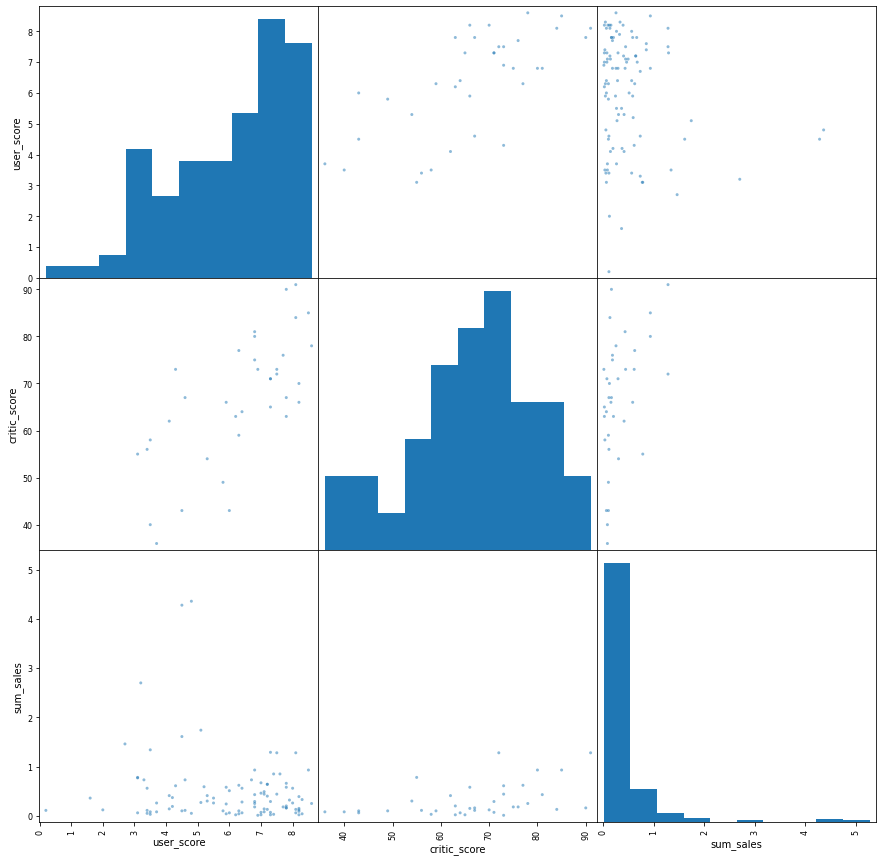

In [124]:
show_correlation("PS3")

              user_score  critic_score  sum_sales
user_score          1.00          0.63      -0.14
critic_score        0.63          1.00       0.53
sum_sales          -0.14          0.53       1.00


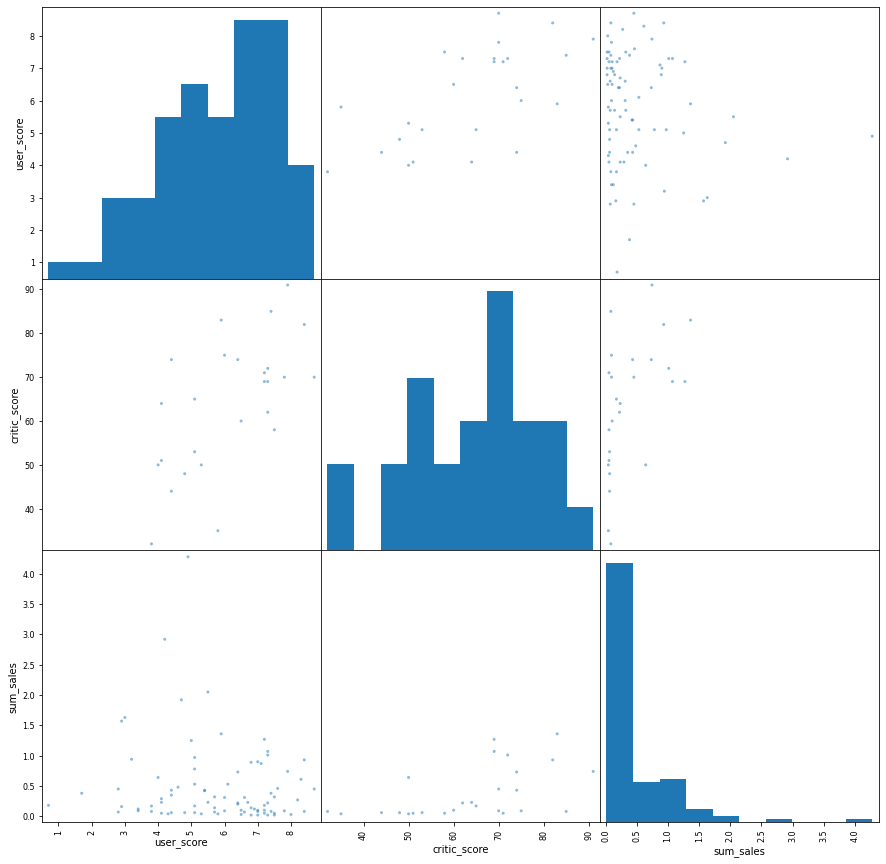

In [125]:
show_correlation('X360')

              user_score  critic_score  sum_sales
user_score          1.00          0.86       0.22
critic_score        0.86          1.00       0.31
sum_sales           0.22          0.31       1.00


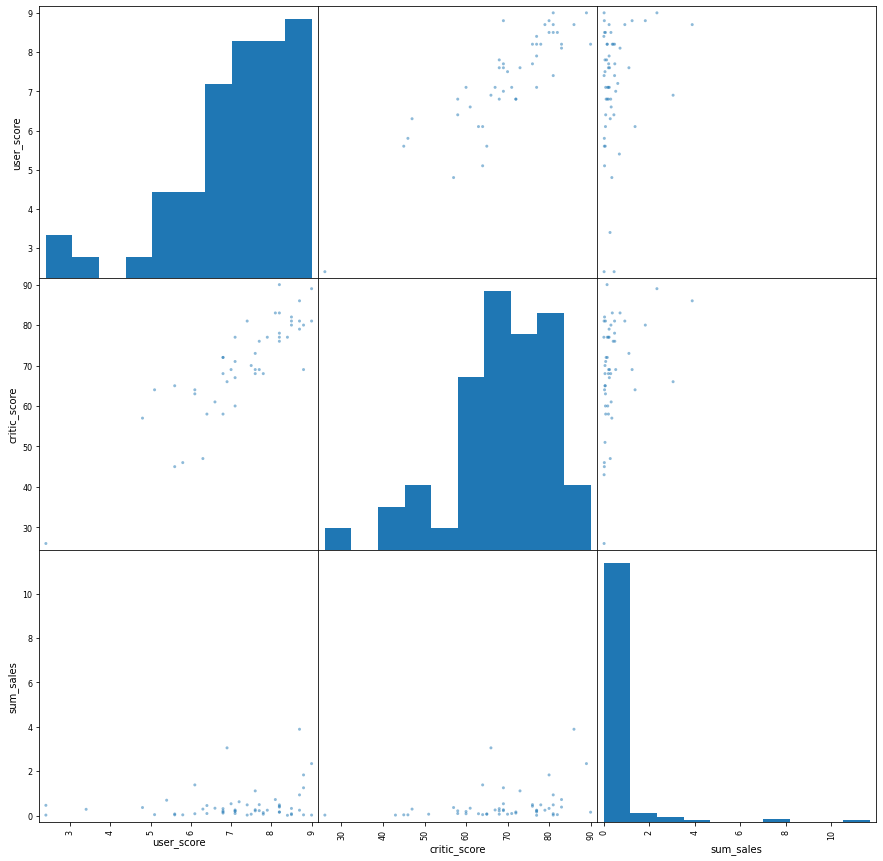

In [126]:
show_correlation('3DS')

<div class="alert alert-info">
Overall, the dependency pattern is the same across all platforms:  

1. Sales are fairly strongly correlated with critic scores.  
2. Sales show little to no correlation with user scores.  

### Analyze the overall distribution of games by genre. What can be said about the most profitable genres? Are there genres with significantly high or low sales?  

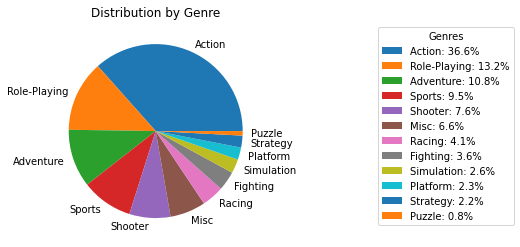

In [127]:
genre_count = df_actual['genre'].value_counts()
fig, ax = plt.subplots()
ax.pie(genre_count.values, labels = genre_count.keys())
percentages = [f"{val / genre_count.sum() * 100:.1f}%" for val in genre_count.values]
labels_with_percent = [f"{genre}: {percent}" for genre, percent in zip(genre_count.index, percentages)]
ax.legend(labels_with_percent, title="Genres", loc="upper left", bbox_to_anchor=(1.5, 1))
plt.title('Distribution by Genre')
plt.show()

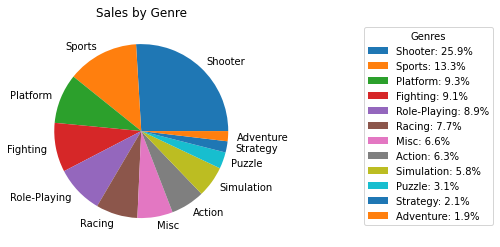

In [128]:
genre_sales = df_actual.pivot_table(index = 'genre', values = 'sum_sales',
                                    aggfunc = 'mean').sort_values('sum_sales', ascending = False)['sum_sales']
fig, ax = plt.subplots()
ax.pie(genre_sales.values, labels = genre_sales.keys())
percentages = [f"{val / genre_sales.sum() * 100:.1f}%" for val in genre_sales.values]
labels_with_percent = [f"{genre}: {percent}" for genre, percent in zip(genre_sales.index, percentages)]
ax.legend(labels_with_percent, title="Genres", loc="upper left", bbox_to_anchor=(1.5, 1))
plt.title('Sales by Genre')
plt.show()

<div class="alert alert-info">

Action games make up a third of all released titles, so it’s no surprise that this genre is the most profitable in absolute terms.

However, when looking at average sales, **shooters** take the lead. Platformers and sports simulators also hold strong positions in the top three. Most of these games have simple mechanics, making them easy to pick up with a low entry barrier. Additionally, shooters and sports simulators benefit from multiple AAA titles catering to various tastes, such as *Call of Duty*, *Battlefield*, and *FIFA*. Platformers, on the other hand, were foundational to the gaming industry and remain familiar and beloved by a wide audience.

The least profitable genres across all metrics are **puzzle, strategy, and adventure** games. However, comparing them to the top-selling genres is not entirely fair. Puzzle games are often free, strategy games cater to a niche audience, and adventure games are a broad category—when combined with shooting mechanics, they resemble shooters, while more vibrant ones often fall under Action.  

## User Profile for Each Region  

### Most Popular Platforms (Top 5). Describe the differences in sales shares.

In [129]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

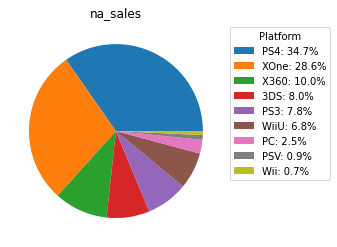

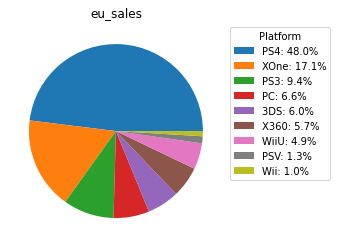

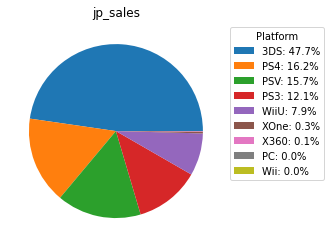

In [130]:
for region in region_sales:
    platform_table = df_actual.pivot_table(index = 'platform', values = region, aggfunc = 'sum').sort_values(region, ascending = False)
    fig, ax = plt.subplots()
    ax.pie(platform_table[region].values, labels = None)
    percentages = [f"{val / platform_table[region].sum() * 100:.1f}%" for val in platform_table[region].values]
    labels_with_percent = [f"{genre}: {percent}" for genre, percent in zip(platform_table[region].index, percentages)]
    ax.legend(labels_with_percent, title="Platform", loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(region)

<div class="alert alert-info">
Top 5 for the North American region: PS4 - 34.7%, XOne - 28.6%, X360 - 10%, 3DS - 8%, PS3 - 7.8% <br>  
Top 5 for the European region: PS4 - 48%, XOne - 17.1%, PS3 - 9.4%, PC - 6.6%, 3DS - 6.0% <br>  
Top 5 for Japan: 3DS - 47.7%, PS4 - 16.2%, PSV - 15.7%, PS3 - 12.1%, WiiU - 7.9% <br>  

Each market has a Japanese-made platform as the leader: <br>  

1. In North America, **PS4** holds a **34.7%** share  
2. In Europe, nearly half of all games **48%** are bought on **PS4**  
3. In Japan, **Nintendo 3DS** dominates with **47.7%**, a portable console likely favored due to high population density and expensive housing  

### Most Popular Genres (Top 5). Explain the Differences.

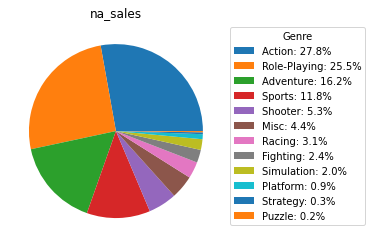

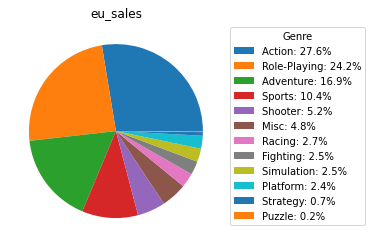

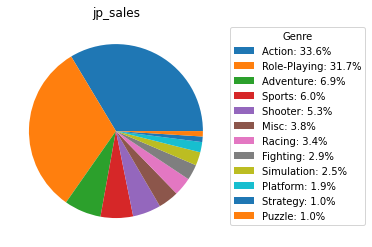

In [131]:
for region in region_sales:
    platform_table = df_actual.pivot_table(index = 'genre', values = region, aggfunc = 'sum').sort_values(region, ascending = False)
    fig, ax = plt.subplots()
    ax.pie(platform_table[region].values, labels = None)
    percentages = [f"{val / platform_table[region].sum() * 100:.1f}%" for val in platform_table[region].values]
    labels_with_percent = [f"{genre}: {percent}" for genre, percent in zip(genre_count.index, percentages)]
    ax.legend(labels_with_percent, title="Genre", loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(region)

<div class="alert alert-info">
Top 5 for the North American region: Action - 30.2%, Shooter - 24.7%, Sports - 13.9%, Role-Playing - 10.3%, Misc - 6.5% 

Top 5 for the European region: Action - 31.5%, Shooter - 22.6%, Sports - 13.7%, Role-Playing - 9.3%, Racing - 5.4% 
    
Top 5 for Japan: Role-Playing - 33.1%, Action - 27.6%, Misc - 7%, Simulation - 5.8%, Shooter - 5.2%

Genre preferences in the **European and American markets are identical**, with the top three being **Action, Shooter, and Sports games**.

In **Japan**, however, **Role-Playing games** take the top spot, **Action** is in second place, and third place is occupied by a mix of **miscellaneous or hybrid genre games**.

This is likely due to the **popularity of different platforms**, as playing shooters on **portable devices** is quite inconvenient. Cultural differences also play a role—Japan is a more **traditional country**, where people prefer to **play soccer in real life rather than on devices** (or perhaps chase Godzilla on devices).  

### Does the ESRB Rating Affect Sales in Each Region?

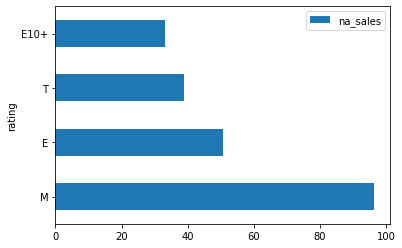

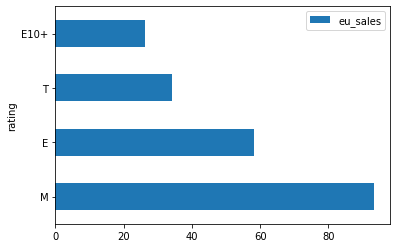

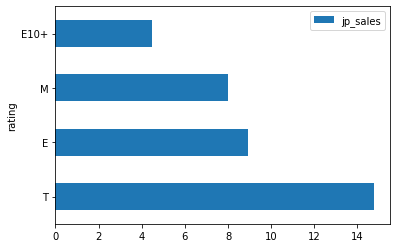

In [132]:
for region in region_sales:
    platform_table = df_actual.pivot_table(index = 'rating', values = region, aggfunc = 'sum')
    platform_table.sort_values(region, ascending = False).plot.barh()

<div class="alert alert-info">

Yes. In **Europe and North America**, games with an **M (17+) rating** are the most popular, giving developers more freedom in terms of game content.
In **Japan**, however, more than half of all sales come from games with an **E (Everyone)** or **T (Teen, 13+) rating**. It seems that a significant portion of Japanese gamers prefer more **family-friendly adventures**.

## Hypothesis Testing

### The average user ratings for Xbox One and PC are the same.

In [133]:
xo_ratings = df_actual.query('platform == "XOne"')['user_score'].dropna()
display(xo_ratings.describe())

count   165.00
mean      6.59
std       1.38
min       1.60
25%       5.80
50%       6.80
75%       7.60
max       9.20
Name: user_score, dtype: float64

In [134]:
pc_ratings = df_actual.query('platform == "PC"')['user_score'].dropna()
display(pc_ratings.describe())

count   122.00
mean      6.30
std       1.70
min       1.40
25%       5.33
50%       6.80
75%       7.60
max       9.30
Name: user_score, dtype: float64

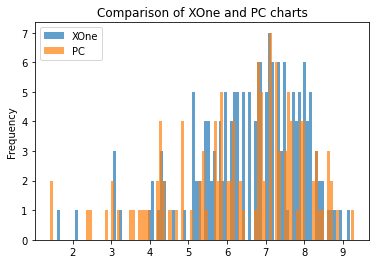

In [135]:
xo_ratings.plot.hist(bins = 100, label = 'XOne', alpha = 0.7)
pc_ratings.plot.hist(bins = 100, label = 'PC', alpha = 0.7)
plt.title('Comparison of XOne and PC charts')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-info">

Studying the information, we can preliminarily conclude that user ratings are very similar. Let's check
    
Null hypothesis: <b>"The average user ratings of Xbox One and PC platforms are the same."</b>
    
Alternative hypothesis: <b>"The average user ratings of Xbox One and PC platforms are different."

In [136]:
alpha = 0.05
results = st.ttest_ind(xo_ratings, pc_ratings)

print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Reject the null hypothesis.")
else:
    print("Failed to reject the null hypothesis.")

p-value: 0.10450648833224654
Failed to reject the null hypothesis.


<div class="alert alert-info">
There are grounds to believe that the average user ratings of Xbox One and PC platforms are indeed the same.

### The average user ratings of the Action and Sports genres are different.

In [137]:
action_ratings = df_actual.query('genre == "Action"')['user_score'].dropna()
print(action_ratings.describe())

count   297.00
mean      6.76
std       1.38
min       2.00
25%       6.10
50%       7.10
75%       7.70
max       9.00
Name: user_score, dtype: float64


In [138]:
sport_ratings = df_actual.query('genre == "Sports"')['user_score'].dropna()
print(sport_ratings.describe())

count   127.00
mean      5.23
std       1.86
min       0.20
25%       4.00
50%       5.50
75%       6.65
max       8.80
Name: user_score, dtype: float64


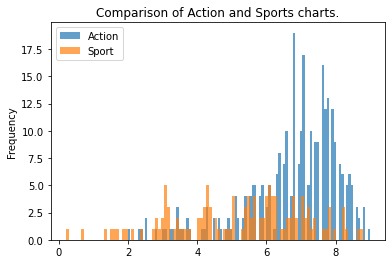

In [139]:
action_ratings.plot.hist(bins = 100, label = 'Action', alpha = 0.7)
sport_ratings.plot.hist(bins = 100, label = 'Sport', alpha = 0.7)
plt.title('Comparison of Action and Sports charts.')
plt.legend(loc = 'upper left')
plt.show()

<div class="alert alert-info">
Изучив информацию можно предварительно придти к выводу пользовательские оценки достаточно сильно отличаются. Проверим<br>
Нулевая гипотеза: <b>"Средние пользовательские рейтинги жанров Action и Sports одинаковые".</b> <br>
Альтернативная гипотеза: <b> "Средние пользовательские рейтинги жанров Action и Sports различаются".</b>

In [140]:
results = st.ttest_ind(action_ratings, sport_ratings)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Reject the null hypothesis.")
else:
    print("Failed to reject the null hypothesis.")

p-value: 2.871146400695882e-19
Reject the null hypothesis.


<div class="alert alert-info">
There is reason to believe that the average user ratings for the Action and Sports genres are indeed different.

## Overall Conclusion

<div class="alert alert-info">  
I have examined and analyzed data from the online store "Streamchik" containing information about games released from 1980 to 2016. <br>  

The dataset includes 16,715 records with information on the **game title**, **platform** it was released on, **release year**, and **genre**. It also contains data on sales in various regions (North America/Europe/Japan/Rest of the World), **age rating**, and **user and critic scores**.  

**During the data preprocessing, I:**    

1. Converted column names to lowercase.  
2. Removed rows missing the game title and release year.  
3. Processed *tbd* (to be decided/determined) values in *user_score* (replaced with NaN).  
4. Converted columns to more appropriate and efficient data types.  
5. Explained the possibility of keeping NaN values in rating and score columns and identified possible reasons for their presence.  

**Key findings from the analysis:**  

**Relevance:**  

1. The peak of game production occurred between 2002 and 2011. After that, production declined, marking the beginning of a new era, making data before 2012 irrelevant for our analysis.  
2. The average lifespan of a platform from its introduction to peak popularity is 6 years, followed by another 6 years of decline.  
3. Given the dynamic nature of the gaming market, a three-year period was selected as the "relevant period." During this period, 1,676 games were released, providing sufficient data for analysis.  

**Sales Analysis:**  

1. Sales continued to decline across all platforms in 2016.  
2. The top-selling platforms were **PS4, PS3, X360, 3DS, and XOne**.  
3. **PS4 is currently the most successful platform.**  
4. There is a **strong correlation** between critic ratings and sales, while **user ratings show little to no correlation** with sales.  
5. **Shooters account for a quarter of all sales.**  
6. **Japanese platforms dominate all markets.** In Europe, half of the sales belong to PS4, while in Japan, 3DS holds the largest share.  
7. **Genre preferences in Europe and North America are identical**, with the top three genres being **action, shooters, and sports games**.  
8. **In Japan, almost two-thirds of all games fall into the action (33%) or role-playing (31%) categories.**  
9. **Sales vary significantly by region based on age rating.** In Europe and North America, games rated **17+** dominate, whereas in Japan, more than half of the games are rated for a **younger audience**.  

**Hypothesis Testing:**  

1. **"The average user ratings for Xbox One and PC platforms are the same."**  - There is reason to believe that this hypothesis is **true**.  
2. **"The average user ratings for Action and Sports genres are the same."** - There is reason to believe that this hypothesis is **false**.

<div class="alert alert-info">  

**Key Recommendations:**  

1. **Focus on High-Sales Platforms:**  
    **PS4** is the most profitable platform with the highest average sales per game. Prioritizing releases for this platform can maximize revenue.  

2. **Prioritize Popular Genres:**  
    **Shooters** have the highest average sales, making them a strong investment. **Sports and platformers** also perform well.  

3. **Leverage Critical Reviews:**  
    Sales are **strongly correlated with critic scores**, so securing high ratings can significantly boost revenue.  

4. **Target Regional Preferences:**  
    In **North America and Europe**, focus on **action, shooters, and sports games**. In **Japan**, prioritize **role-playing games (RPGs) and action games**, especially on portable platforms.  